In [262]:
# Import libraries and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

In [263]:
df = pd.read_csv('forestfire.csv')
df.head()

,X,Y,OBJECTID,StationName,WXID,ObservedDate,NESSID,NWSID,Elevation,SiteDescription,...,WindDirDegrees,AirTempStandPlace,FuelTemp,RelativeHumidity,BatteryVoltage,FuelMoisture,WindDirPeak,WindSpeedPeak,SolarRadiation,StationID
0,-90.08306,44.02861,1,NECEDAH,17372963.0,2022/10/19 16:47:59+00,8376139A,474301,950.0,NaN,...,300 degrees,36 deg. F,45 deg. F,58 %,13.2 volts,11.8 (unk),303 degrees,19 mph,420 w/m2,17372963
1,-84.65417,36.47500,2,BISO-NP,17246242.0,2022/03/15 12:54:00+00,FA6321D4,400902,1445.0,NaN,...,197 degrees,41 deg. F,41 deg. F,75 %,12.9 volts,12.6 (unk),300 degrees,2 mph,37 w/m2,17246242
2,-105.02978,46.30739,3,KNOWLTON,16831540.0,2022/05/02 22:40:00+00,325AE3F8,244102,3320.0,SITE IS LOCATED ON A SMALL KNOLL APPROX. 30 YD...,...,180 degrees,55 deg. F,NO DATA,44 %,13.7 volts,NO DATA,198 degrees,22 mph,442 w/m2,16831540
3,-122.57000,38.03944,4,BIG ROCK,17414417.0,2022/08/03 15:33:59+00,CA28F196,42310,1500.0,NaN,...,144 degrees,62 deg. F,65 deg. F,78 %,13.1 volts,11.3 (unk),115 degrees,6 mph,138 w/m2,17414417
4,-106.29250,37.33111,5,SAN LUIS VALLEY PORTABLE,17567535.0,2022/05/06 01:39:00+00,32941370,NaN,9170.0,SLV Portable is located on the Conejos Peak Di...,...,NO DATA,51 deg. F,NO DATA,22 %,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,17567535


Column Description:  
X              : Coordinate  
Y              : Coordinate  
OBJECTID       : Index  
StationName    : Name of Station  
WXID           : WX Weather Station ID  
ObservedDate   : Observation Date  
NESSID         : National Environmental Satellite Service ID  
NWSID          : WIMS Station ID   
Elevation      : Elevation of the center point of the sensor array at the weather station in whole feet above mean sea level (MSL)    
SiteDescription: Site Descriptions    
Latitude       : Latitude    
Longitude      : Longitude  
State          : State  
County         : County  
Agency         : Agency   
Region         : Region   
Unit           : Unit  
SubUnit        : Subunit  
  
Status         : Active, Deactive, Proposed, Removed   
     - Active: Data transmission is processed by the station   
     - Deactive: Data maybe transmitted but will not be processed   
     - Proposed: Incomplete data    
     - Removed: System assigned status when a station is deleted   
    
RainAccumulation: Rain accumulation     
WindSpeedMPH    : Wind Speed MPH   
WindDirDegrees  : Wind direction degrees    
AirTempStandPlace: Air Temperature, Farenheit    
FuelTemp         : Fuel Temperature, Farenheit    
RelativeHumidity : Relative Humidity    
BatteryVoltage   : Battery of Satellite (Volt)    
FuelMoisture     : Fuel Moisture   
WindDirPeak      : Wind Direction at the peak of location (no obstacles)     
WindSpeedPeak    : Wind Speed at the peak of location (no obstacles)     
SolarRadiation   : Solar Radiation  
StationID        : Station ID  

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  4914 non-null   float64
 1   Y                  4914 non-null   float64
 2   OBJECTID           4916 non-null   int64  
 3   StationName        4916 non-null   object 
 4   WXID               4479 non-null   float64
 5   ObservedDate       4916 non-null   object 
 6   NESSID             4479 non-null   object 
 7   NWSID              3716 non-null   object 
 8   Elevation          4470 non-null   float64
 9   SiteDescription    2502 non-null   object 
 10  Latitude           4479 non-null   float64
 11  Longitude          4479 non-null   float64
 12  State              4479 non-null   object 
 13  County             4177 non-null   object 
 14  Agency             4479 non-null   object 
 15  Region             4431 non-null   object 
 16  Unit               4249 

In [265]:
df.describe()

,X,Y,OBJECTID,WXID,Elevation,Latitude,Longitude,StationID
count,4914.000000,4914.000000,4916.000000,4.479000e+03,4470.000000,4479.000000,4479.000000,4.916000e+03
mean,-110.024942,40.436903,2458.500000,1.744124e+07,3453.018121,40.211035,-109.685657,1.748614e+07
std,19.069540,7.925794,1419.271292,7.420905e+05,2683.893339,7.898845,18.593720,7.308629e+05
min,-170.721860,14.262000,1.000000,1.677753e+07,-95.000000,-14.276140,-170.721860,1.677753e+07
25%,-119.505780,35.294890,1229.750000,1.696159e+07,1047.000000,35.155000,-119.521610,1.698208e+07
50%,-113.250995,39.775235,2458.500000,1.720631e+07,2865.000000,39.603580,-112.776780,1.727723e+07
75%,-99.650750,44.157220,3687.250000,1.747765e+07,5509.750000,44.111140,-98.157220,1.754835e+07
max,145.717780,69.370000,4916.000000,1.988302e+07,12120.000000,69.370000,145.717780,1.988302e+07


Based on the understanding on the datasets, the data collected in the devices are divided into 4 different status, Active, Deactive, Proposed, and Removed.  
  
We would only obtained the active data for trustable sources to understand the cause of Forest Fire.  

In [266]:
df = df.loc[df['Status'] == 'A']

Battery voltage only presents the functionality of the satellite/sensor, so we are dropping this column too.  

We are concentrating at the causes of the forest fire. Thus, we are dropping unnecessary information such as ID, Name, Description and sub-regional information.  

In [267]:
drop_col = ['OBJECTID', 'StationName', 'WXID', 'NESSID', 'NWSID', 'Unit', 'SubUnit', 
                  'SiteDescription', 'State', 'County', 'Agency', 'Region', 'StationID', 'Status', 'BatteryVoltage']
df = df.drop(drop_col, axis = 1)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089 entries, 0 to 4915
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  3087 non-null   float64
 1   Y                  3087 non-null   float64
 2   ObservedDate       3089 non-null   object 
 3   Elevation          3086 non-null   float64
 4   Latitude           3089 non-null   float64
 5   Longitude          3089 non-null   float64
 6   RainAccumulation   3089 non-null   object 
 7   WindSpeedMPH       3089 non-null   object 
 8   WindDirDegrees     3089 non-null   object 
 9   AirTempStandPlace  3089 non-null   object 
 10  FuelTemp           3089 non-null   object 
 11  RelativeHumidity   3089 non-null   object 
 12  FuelMoisture       3089 non-null   object 
 13  WindDirPeak        3089 non-null   object 
 14  WindSpeedPeak      3089 non-null   object 
 15  SolarRadiation     3089 non-null   object 
dtypes: float64(5), object(11

Let's convert 'ObservedDate' into datetime type.

In [269]:
df['ObservedDate'] = pd.to_datetime(df['ObservedDate'])

In [270]:
# Replace NO DATA into NaN
df = df.replace('NO DATA', np.nan)

In [271]:
df.isna().sum()

X                       2
Y                       2
ObservedDate            0
Elevation               3
Latitude                0
Longitude               0
RainAccumulation        7
WindSpeedMPH           10
WindDirDegrees        756
AirTempStandPlace      13
FuelTemp             1859
RelativeHumidity        7
FuelMoisture         1884
WindDirPeak           759
WindSpeedPeak         824
SolarRadiation        815
dtype: int64

In [272]:
# We first analyze the data based on its non-null copy.  
df_notnull = df.copy()

In [273]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089 entries, 0 to 4915
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   X                  3087 non-null   float64            
 1   Y                  3087 non-null   float64            
 2   ObservedDate       3089 non-null   datetime64[ns, UTC]
 3   Elevation          3086 non-null   float64            
 4   Latitude           3089 non-null   float64            
 5   Longitude          3089 non-null   float64            
 6   RainAccumulation   3082 non-null   object             
 7   WindSpeedMPH       3079 non-null   object             
 8   WindDirDegrees     2333 non-null   object             
 9   AirTempStandPlace  3076 non-null   object             
 10  FuelTemp           1230 non-null   object             
 11  RelativeHumidity   3082 non-null   object             
 12  FuelMoisture       1205 non-null   object       

Visualizing without missing data

In [274]:
df_notnull = df_notnull.dropna()

In [275]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 4913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   X                  1102 non-null   float64            
 1   Y                  1102 non-null   float64            
 2   ObservedDate       1102 non-null   datetime64[ns, UTC]
 3   Elevation          1102 non-null   float64            
 4   Latitude           1102 non-null   float64            
 5   Longitude          1102 non-null   float64            
 6   RainAccumulation   1102 non-null   object             
 7   WindSpeedMPH       1102 non-null   object             
 8   WindDirDegrees     1102 non-null   object             
 9   AirTempStandPlace  1102 non-null   object             
 10  FuelTemp           1102 non-null   object             
 11  RelativeHumidity   1102 non-null   object             
 12  FuelMoisture       1102 non-null   object       

Finding relationships between X, Y, Longitude and Latitude  

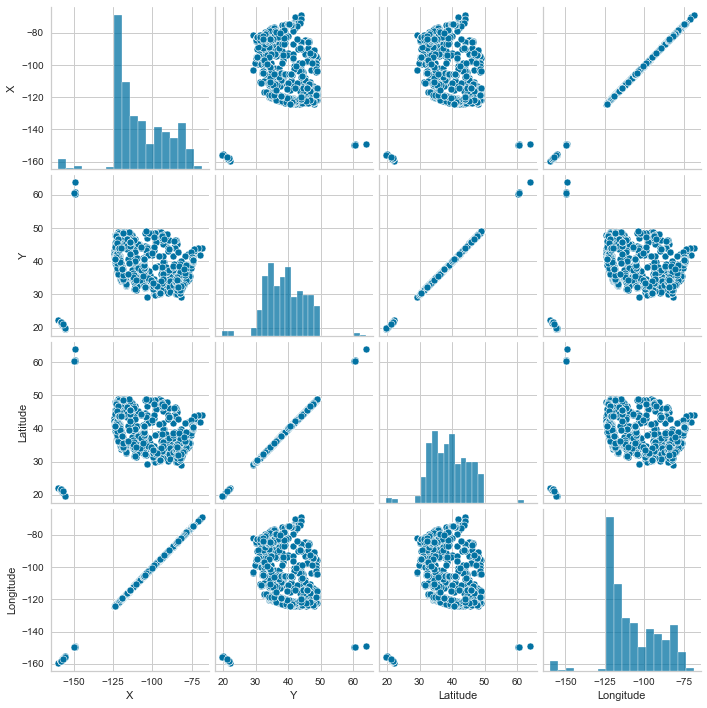

In [276]:
sns.pairplot(df_notnull[['X', 'Y', 'Latitude', 'Longitude']])

In [277]:
cor = df_notnull.corr()
cor

,X,Y,Elevation,Latitude,Longitude
X,1.000000,-0.138769,-0.349321,-0.138768,1.000000
Y,-0.138769,1.000000,0.072483,1.000000,-0.138769
Elevation,-0.349321,0.072483,1.000000,0.072483,-0.349322
Latitude,-0.138768,1.000000,0.072483,1.000000,-0.138768
Longitude,1.000000,-0.138769,-0.349322,-0.138768,1.000000


Text(0.5, 1.0, 'HeatMap Correlation Plot')

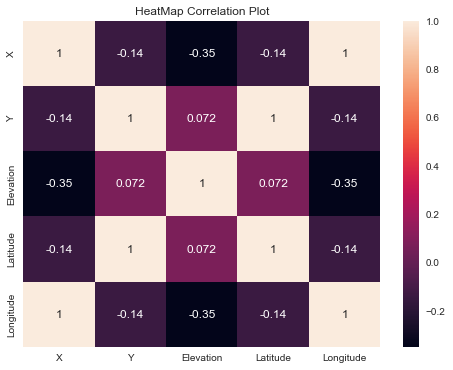

In [278]:
sns.heatmap(cor, annot=True)
plt.title("HeatMap Correlation Plot")

Apparently X is correlated to Longitude and Y is correlated to Latitude

We chose to drop X, Y instead of Latitude and Longitude because of the ambiguity of where X and Y are defined.  

In [279]:
df_notnull = df_notnull.drop(['X', 'Y'], axis = 1)
df_notnull.head()

,ObservedDate,Elevation,Latitude,Longitude,RainAccumulation,WindSpeedMPH,WindDirDegrees,AirTempStandPlace,FuelTemp,RelativeHumidity,FuelMoisture,WindDirPeak,WindSpeedPeak,SolarRadiation
0,2022-10-19 16:47:59+00:00,950.0,44.02861,-90.08306,24.86 inches,10 mph,300 degrees,36 deg. F,45 deg. F,58 %,11.8 (unk),303 degrees,19 mph,420 w/m2
3,2022-08-03 15:33:59+00:00,1500.0,38.03944,-122.57000,3.53 inches,3 mph,144 degrees,62 deg. F,65 deg. F,78 %,11.3 (unk),115 degrees,6 mph,138 w/m2
12,2022-10-19 17:27:00+00:00,509.0,32.48361,-85.55556,4.06 inches,5 mph,187 degrees,57 deg. F,59 deg. F,28 %,10.8 (unk),187 degrees,11 mph,512 w/m2
36,2022-05-31 02:00:00+00:00,7540.0,36.72417,-118.94250,13.46 inches,3 mph,320 degrees,50 deg. F,52 deg. F,47 %,6.7 (unk),293 degrees,7 mph,73 w/m2
42,2022-10-19 17:23:00+00:00,3872.0,44.58179,-104.71950,14.53 inches,5 mph,41 degrees,64 deg. F,70 deg. F,31 %,11.6 (unk),34 degrees,10 mph,454 w/m2


Now, we are analyzing numerical columns  
First, we transform them into numerical type first  

In [280]:
numerical_column = ['RainAccumulation', 'WindSpeedMPH', 'WindDirDegrees', 'AirTempStandPlace', 
                    'FuelTemp', 'RelativeHumidity', 'FuelMoisture', 'WindDirPeak', 
                    'WindSpeedPeak', 'SolarRadiation']

for change in numerical_column:
    df_notnull.loc[:, change] = df_notnull.loc[:, change].apply(lambda x: float(x.split()[0]))
df_notnull.head()

,ObservedDate,Elevation,Latitude,Longitude,RainAccumulation,WindSpeedMPH,WindDirDegrees,AirTempStandPlace,FuelTemp,RelativeHumidity,FuelMoisture,WindDirPeak,WindSpeedPeak,SolarRadiation
0,2022-10-19 16:47:59+00:00,950.0,44.02861,-90.08306,24.86,10.0,300.0,36.0,45.0,58.0,11.8,303.0,19.0,420.0
3,2022-08-03 15:33:59+00:00,1500.0,38.03944,-122.57000,3.53,3.0,144.0,62.0,65.0,78.0,11.3,115.0,6.0,138.0
12,2022-10-19 17:27:00+00:00,509.0,32.48361,-85.55556,4.06,5.0,187.0,57.0,59.0,28.0,10.8,187.0,11.0,512.0
36,2022-05-31 02:00:00+00:00,7540.0,36.72417,-118.94250,13.46,3.0,320.0,50.0,52.0,47.0,6.7,293.0,7.0,73.0
42,2022-10-19 17:23:00+00:00,3872.0,44.58179,-104.71950,14.53,5.0,41.0,64.0,70.0,31.0,11.6,34.0,10.0,454.0


In [281]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 4913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   ObservedDate       1102 non-null   datetime64[ns, UTC]
 1   Elevation          1102 non-null   float64            
 2   Latitude           1102 non-null   float64            
 3   Longitude          1102 non-null   float64            
 4   RainAccumulation   1102 non-null   float64            
 5   WindSpeedMPH       1102 non-null   float64            
 6   WindDirDegrees     1102 non-null   float64            
 7   AirTempStandPlace  1102 non-null   float64            
 8   FuelTemp           1102 non-null   float64            
 9   RelativeHumidity   1102 non-null   float64            
 10  FuelMoisture       1102 non-null   float64            
 11  WindDirPeak        1102 non-null   float64            
 12  WindSpeedPeak      1102 non-null   float64      

Based on our physics knowledge, we know that there are some relationships between temperature and solar radiation; rain, moisture and humidity; and wind speed and direction and its corresponding directions.  

Thus, we would try to analyze if our assumptions were correct.  

In [282]:
heat = ['AirTempStandPlace', 'FuelTemp', 'SolarRadiation']
red = df_notnull[heat]

In [283]:
humid = ['RainAccumulation', 'RelativeHumidity', 'FuelMoisture']
blue = df_notnull[humid]

In [284]:
air = ['WindSpeedMPH', 'WindDirDegrees', 'WindSpeedPeak', 'WindDirPeak']
green = df_notnull[air]

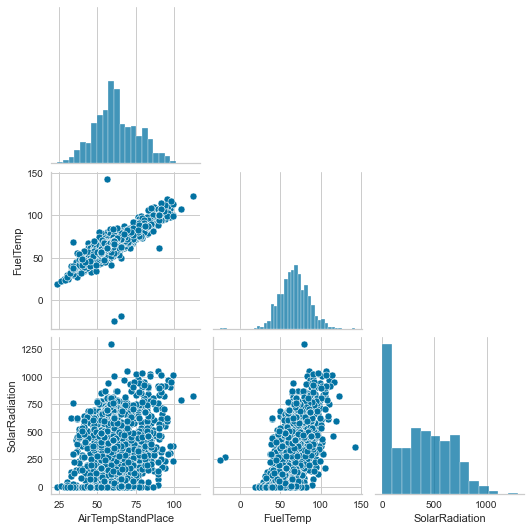

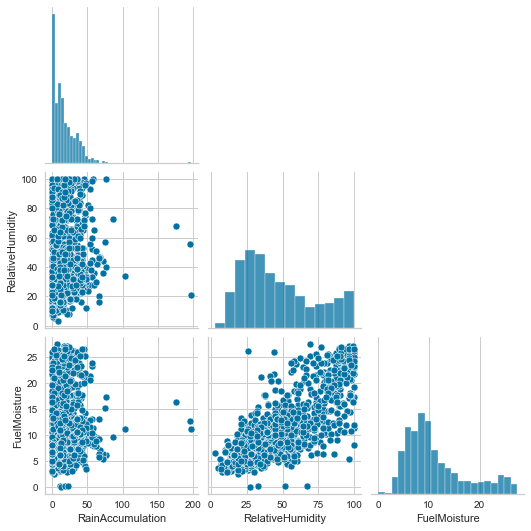

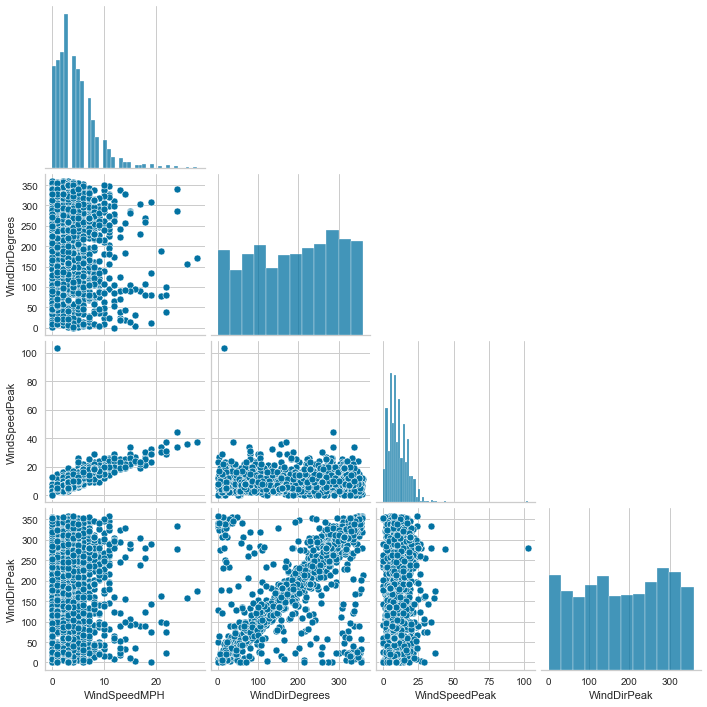

In [285]:
group = [heat, humid, air]

for index in group:
    sns.pairplot(df_notnull[index], diag_kind = 'hist', corner = True)

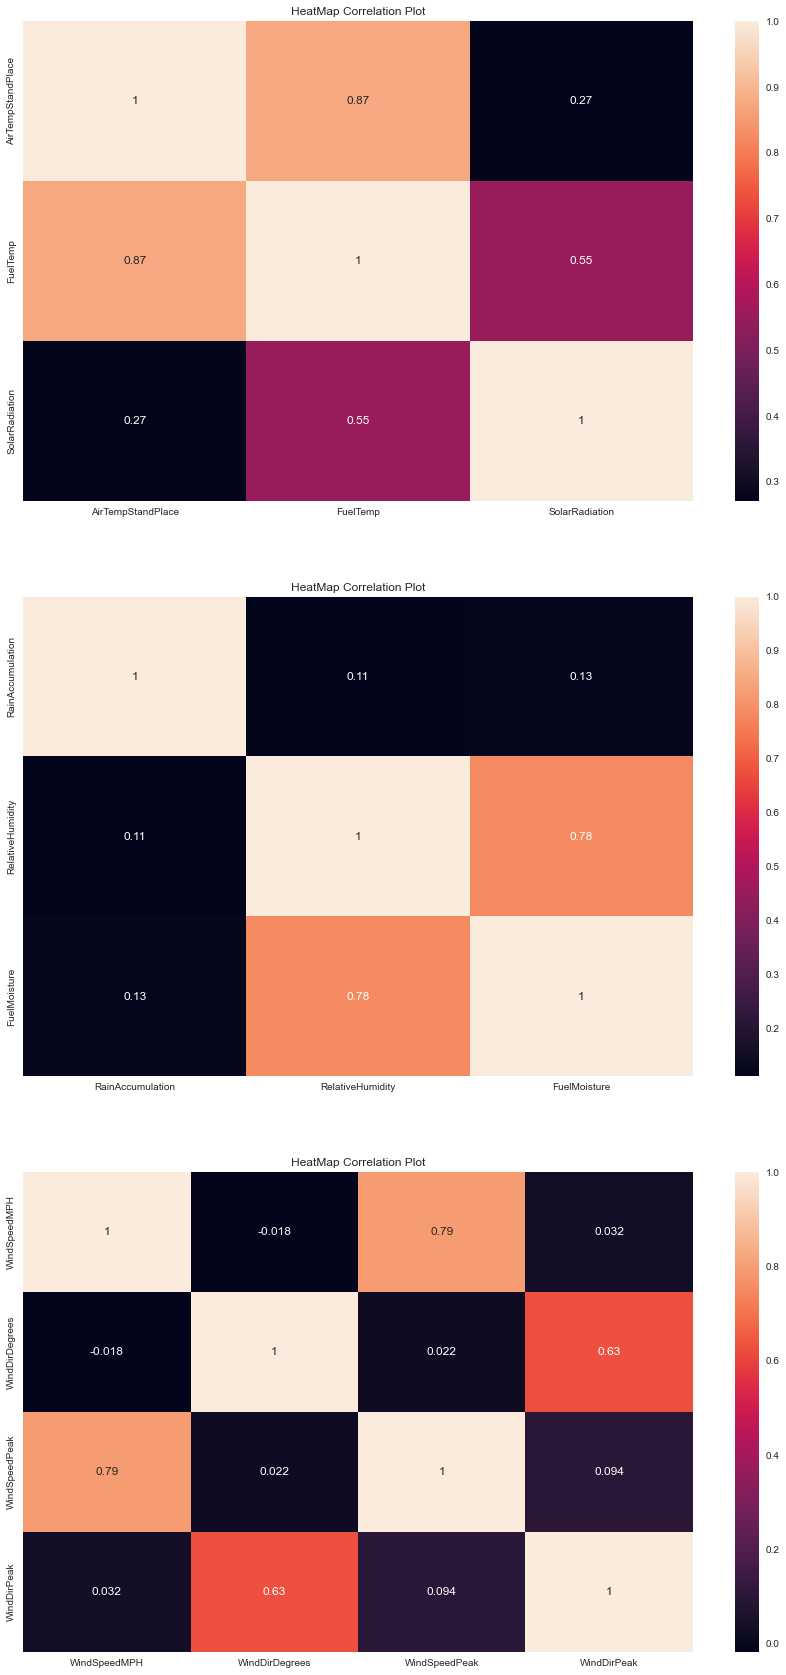

In [286]:
group = [heat, humid, air]
plt.figure(figsize = [15, 30])

for i, index in enumerate(group):
    plt.subplot(len(group), 1, i + 1)
    sns.heatmap(df_notnull[index].corr(), annot=True)
    plt.title("HeatMap Correlation Plot")

From the pairplots and heatmap above, we can see that there are high correlation between some variables, for example:  
- WindSpeedMPH vs WindSpeedPeak  
- WindDirDegrees vs WindDirPeak  
- FuelMoisture vs RelativeHumidity  
- FuelTemp vs AirTempStandPlace  

We are dropping Fuel related features because we don't have enough information of what fuel here represent due to the reason that different fuel has different combustion point. Also, we drop the peak information because the locations of the forest fire are not only located at the peak area.  

In [287]:
df_notnull = df_notnull.drop(['FuelTemp', 'FuelMoisture', 'WindSpeedPeak', 'WindDirPeak'], axis = 1)

Visualizing the trends of climate conditions over time from May 2022 to October 2022

In [288]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 4913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   ObservedDate       1102 non-null   datetime64[ns, UTC]
 1   Elevation          1102 non-null   float64            
 2   Latitude           1102 non-null   float64            
 3   Longitude          1102 non-null   float64            
 4   RainAccumulation   1102 non-null   float64            
 5   WindSpeedMPH       1102 non-null   float64            
 6   WindDirDegrees     1102 non-null   float64            
 7   AirTempStandPlace  1102 non-null   float64            
 8   RelativeHumidity   1102 non-null   float64            
 9   SolarRadiation     1102 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(9)
memory usage: 94.7 KB


Text(0.5, 1.0, 'Rain Accumulation from May 2022 to October 2022')

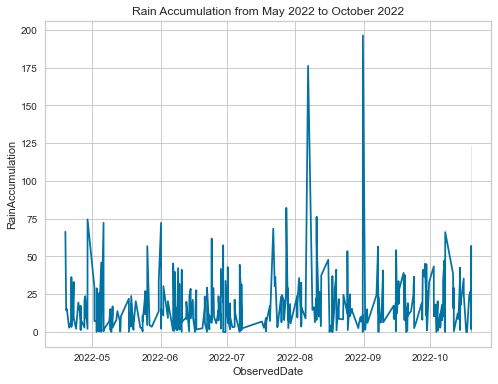

In [289]:
sns.lineplot(x = 'ObservedDate', y = 'RainAccumulation', data = df_notnull)
plt.title('Rain Accumulation from May 2022 to October 2022')

The rain accumulation appeared to be higher in August 2022 (could be the transition from summer to fall seasons).  

Text(0.5, 1.0, 'Wind Speed (mph) from May 2022 to October 2022')

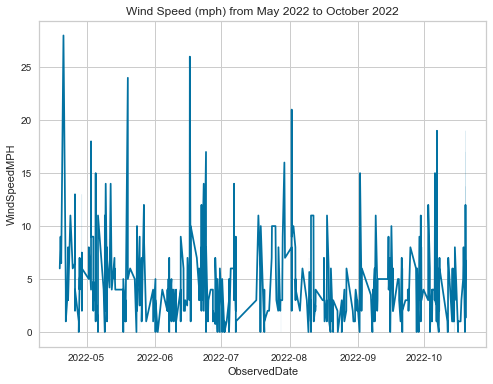

In [290]:
sns.lineplot(x = 'ObservedDate', y = 'WindSpeedMPH', data = df_notnull)
plt.title('Wind Speed (mph) from May 2022 to October 2022')

The wind speed seems to be decreasing from May 2022 to October 2022.

Text(0.5, 1.0, 'Wind Direction (degrees) from May 2022 to October 2022')

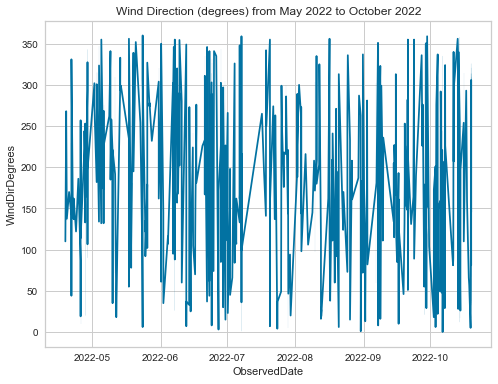

In [291]:
sns.lineplot(x = 'ObservedDate', y = 'WindDirDegrees', data = df_notnull)
plt.title('Wind Direction (degrees) from May 2022 to October 2022')

From the plot above, wind direction seems to be distributed evenly. This is very likely because the wind direction is dependent on the location where the data is collected.  

Text(0.5, 1.0, 'Air Temperature (Farenheit) from May 2022 to October 2022')

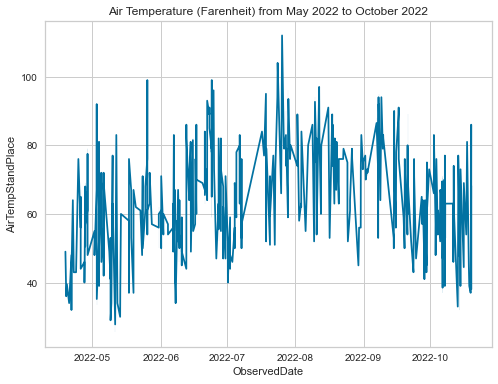

In [292]:
sns.lineplot(x = 'ObservedDate', y = 'AirTempStandPlace', data = df_notnull)
plt.title('Air Temperature (Farenheit) from May 2022 to October 2022')

Air temperature appears to be at its peak in August (the end of Summer), it was increasing then decreasing from May 2022 to October 2022.  

Text(0.5, 1.0, 'Relative Humidity from May 2022 to October 2022')

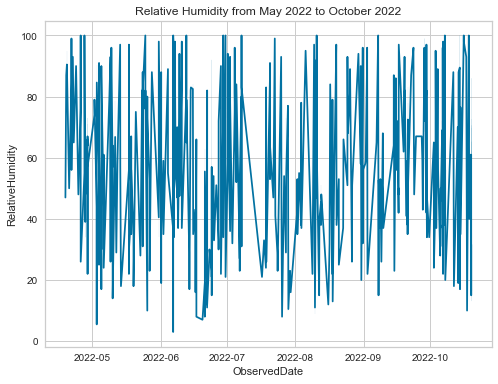

In [293]:
sns.lineplot(x = 'ObservedDate', y = 'RelativeHumidity', data = df_notnull)
plt.title('Relative Humidity from May 2022 to October 2022')

Same with wind direction, relative humidity doesn't give a clear insight at how it is distributing. It is because relative humidity might be dependent on the location where the data is collected.  

Text(0.5, 1.0, 'Solar Radiation from May 2022 to October 2022')

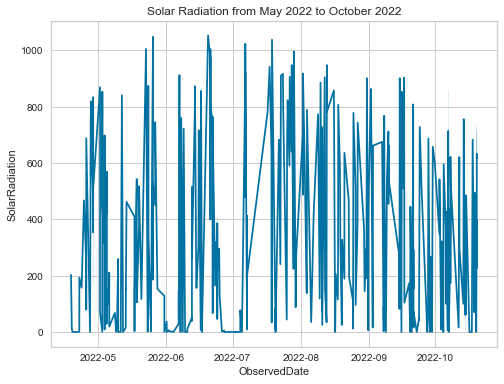

In [294]:
sns.lineplot(x = 'ObservedDate', y = 'SolarRadiation', data = df_notnull)
plt.title('Solar Radiation from May 2022 to October 2022')

Same with relative humidity, solar radiation could be also dependent on the location (elevation) of where the data is collected.  

Missing value Analysis

In [295]:
#!pip install fancyimpute -q

from fancyimpute import KNN, IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer

import missingno as msno

Update df based on analysis on df_notnull

In [296]:
df = df.drop(['X', 'Y', 'FuelTemp', 'FuelMoisture', 'WindDirPeak', 'WindSpeedPeak'], axis = 1)

In [297]:
numerical_column = ['RainAccumulation', 'WindSpeedMPH', 'WindDirDegrees', 'AirTempStandPlace', 'RelativeHumidity', 'SolarRadiation']

for change in numerical_column:
    df.loc[~df[change].isnull(), change] = df.loc[~df[change].isnull(), change].apply(lambda x: float(x.split()[0]))
    

In [298]:
df.isna().sum()

ObservedDate           0
Elevation              3
Latitude               0
Longitude              0
RainAccumulation       7
WindSpeedMPH          10
WindDirDegrees       756
AirTempStandPlace     13
RelativeHumidity       7
SolarRadiation       815
dtype: int64

<AxesSubplot:>

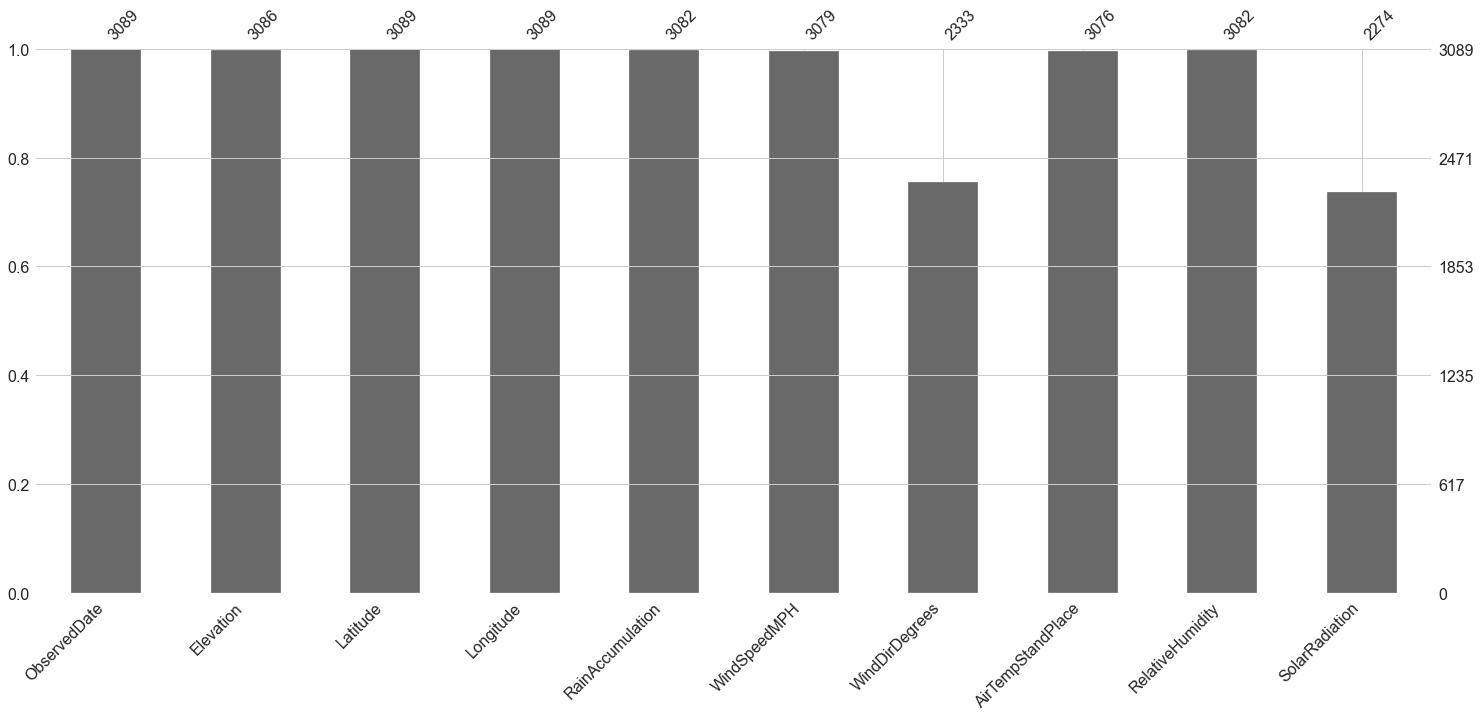

In [299]:
msno.bar(df)

<AxesSubplot:>

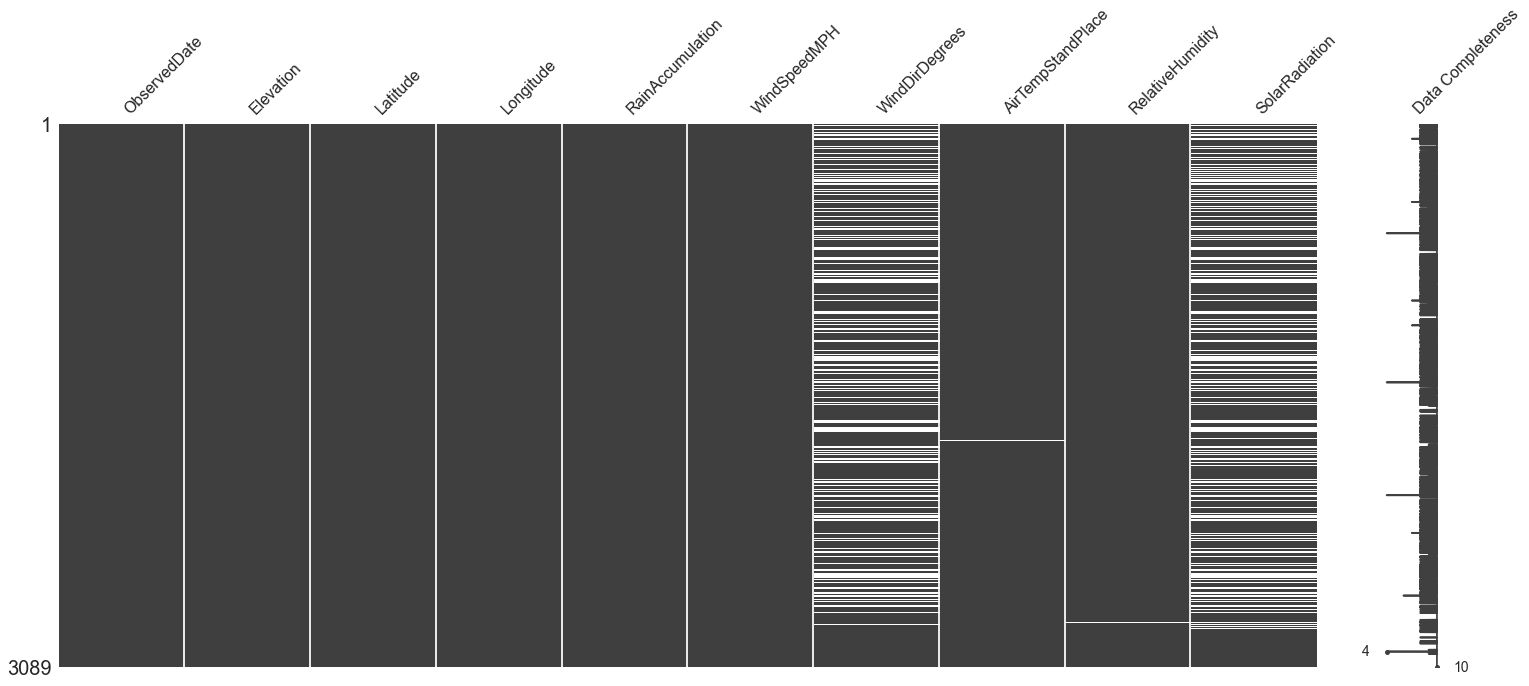

In [300]:
msno.matrix(df, labels = True)

Here we can see that WindDirDegrees and SolarRadiation have quite similar pattern in missing values matrix. It is highly doubted that the devices in these corresponding spots do not collect these datas.  

Since Elevation, Wind Direction, Solar radiation, and RelativeHumidity don't show a trend (based on the line plot with ObservedDate), we use mean imputation to fill null values.

In [301]:
mean_imputer = SimpleImputer(strategy = 'mean')
df[['Elevation', 'WindDirDegrees', 'SolarRadiation', 'RelativeHumidity']] = mean_imputer.fit_transform(df[['Elevation', 'WindDirDegrees', 'SolarRadiation', 'RelativeHumidity']])

In [302]:
df.isna().sum()

ObservedDate          0
Elevation             0
Latitude              0
Longitude             0
RainAccumulation      7
WindSpeedMPH         10
WindDirDegrees        0
AirTempStandPlace    13
RelativeHumidity      0
SolarRadiation        0
dtype: int64

In [303]:
columns = ['RainAccumulation', 'WindSpeedMPH', 'AirTempStandPlace']

for col in columns:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')


While for 'RainAccumulation', 'WindSpeedMPH', and 'AirTempStandPlace', we will impute the null values with linear interpolation because they show a linear trends between some points.  

In [304]:
df[['RainAccumulation', 'WindSpeedMPH', 'AirTempStandPlace']] = df[['RainAccumulation', 'WindSpeedMPH', 'AirTempStandPlace']].interpolate(method = 'linear')


In [305]:
df.isna().sum()

ObservedDate         0
Elevation            0
Latitude             0
Longitude            0
RainAccumulation     0
WindSpeedMPH         0
WindDirDegrees       0
AirTempStandPlace    0
RelativeHumidity     0
SolarRadiation       0
dtype: int64

Visualizing and analyzing the relationships between other columns.  
- WindSpeedMPH vs RainAccumulation  
- WindSpeedMPH vs AirTempStandPlace
- WindSpeedMPH vs RelativeHumidity
- AirTempStandPlace vs RelativeHumidity
- SolarRadiation vs RelativeHumidity
- SolarRadiation vs RainAccumulation

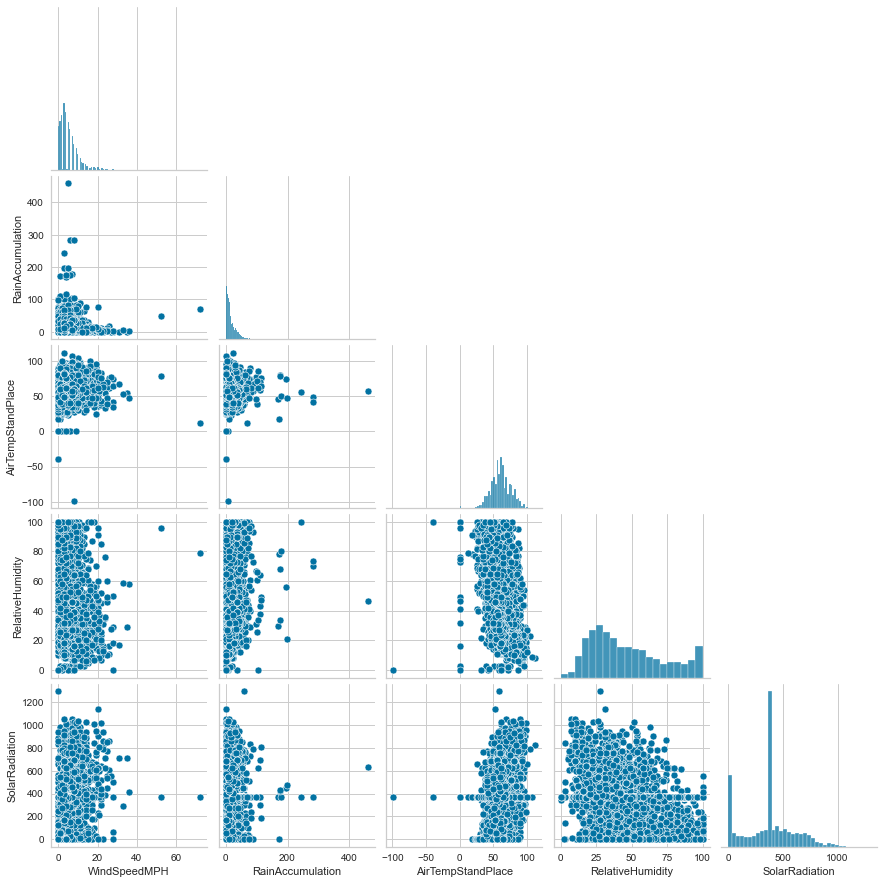

In [306]:
cols = ['WindSpeedMPH', 'RainAccumulation', 'AirTempStandPlace', 'RelativeHumidity', 'SolarRadiation']

sns.pairplot(df[cols], diag_kind = 'hist', corner = True)

From the pairplot above, we can see that RainAccumulation is inversely proportional to the WindSpeedMPH. Besides, AirTempStandPlace shows a low negative correlation to AirTempStandPlace and RainAccumulation. RelativeHumidity seems independent on the features above and it is the same for solar radiation.  

Here we visualize the relationship between SolarRadiation, RelativeHumidity, Latitude, and Longitude, because I assume the SolarRadiation and RelativeHumidity is dependent on the locations.   

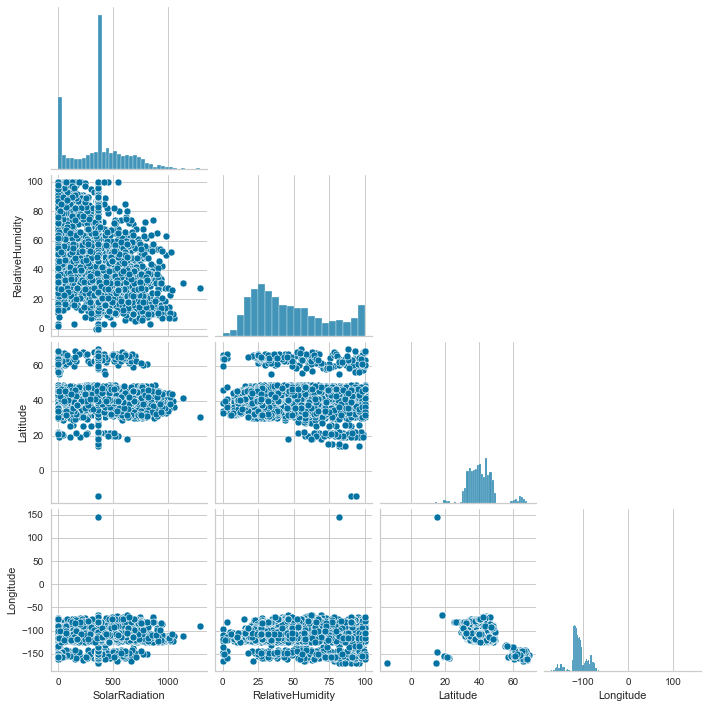

In [307]:
cols = ['SolarRadiation', 'RelativeHumidity', 'Latitude', 'Longitude']

sns.pairplot(df[cols], diag_kind = 'hist', corner = True)

From the above graphs, we can tell that the RelativeHumidity and SolarRadiation are independent on the locations and suspiciously there is a high peak in SolarRadiation histogram. That is highly likely the mean value of SolarRadiation.   

Now, we will be creating a model based on the climate factors.

In [308]:
df = df.drop('ObservedDate', axis = 1)

Modelling

In [309]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Dimensional Reduction

In [310]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)
transformed = pca.transform(df_scaled)

features = range(pca.n_components_)
#print(pca.components_)

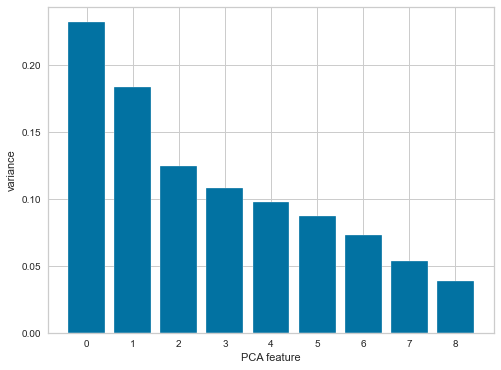

In [311]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

Pick the features those have the highest feature variance

In [312]:
pca.explained_variance_ratio_.cumsum()

array([0.23231881, 0.41630277, 0.54086114, 0.64952053, 0.74713742,
       0.83465813, 0.90748668, 0.96118975, 1.        ])

The first 6 principal components explain 90% of the data. This also means the features selected are highly uncorrelated.   

Text(0, 0.5, 'Cumulative Explained Variance')

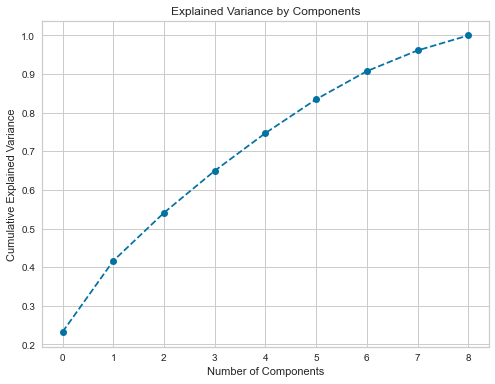

In [313]:
plt.plot(features, pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [314]:
pca = PCA(n_components = 6)
pca.fit(df_scaled)

df_pca = pca.transform(df_scaled)
print(df_pca.shape)

(3089, 6)


Hierarchical clustering and Dendrogram

In [316]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram

We pick the first two columns for analysis because the first two columns provide the highest feature importance that contribute more for modelling

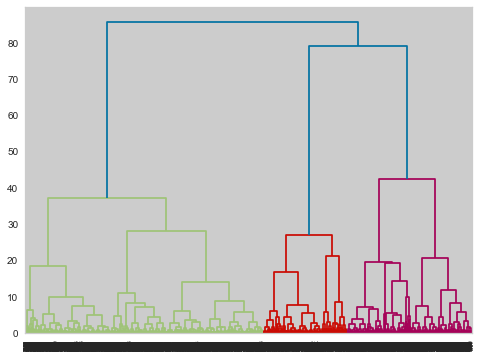

In [317]:
xs = df_pca[:, 0]
ys = df_pca[:, 1]

df_hierarchy = pd.DataFrame({'x_coordinate': xs,
                             'y_coordinate': ys})

Z = linkage(df_hierarchy, method = 'ward', metric = 'euclidean')
dn = dendrogram(Z)
plt.show()

<AxesSubplot:xlabel='x_coordinate', ylabel='y_coordinate'>

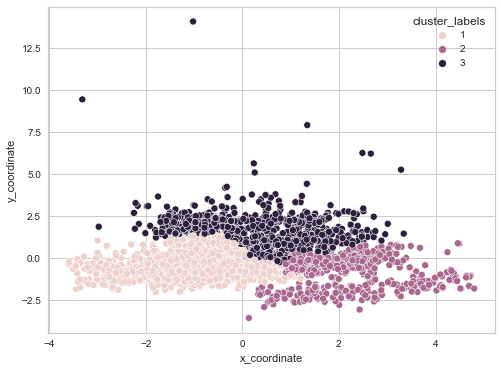

In [318]:
Z = linkage(df_hierarchy, 'ward')
df_hierarchy['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

sns.scatterplot(x = 'x_coordinate', y = 'y_coordinate', 
                hue = 'cluster_labels', data = df_hierarchy)

<AxesSubplot:>

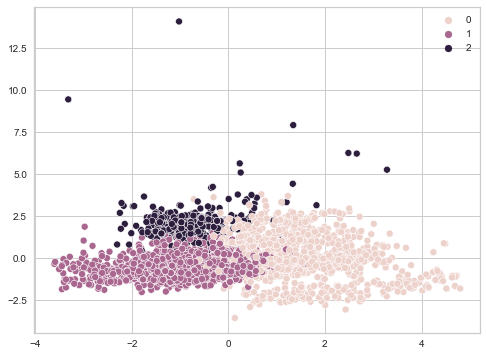

In [319]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

agg.fit(df_pca)
labels = agg.labels_

sns.scatterplot(x = df_pca[:, 0], y = df_pca[:, 1], hue = labels)

K-means clustering

In [320]:
from scipy.cluster.vq import kmeans, vq

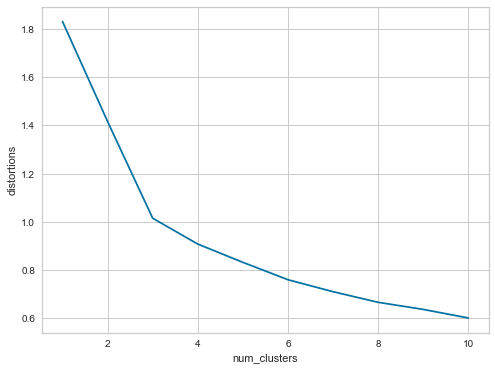

In [321]:
distortions = []
for k in range(1, 11):
    centroids, distortion = kmeans(df_kmeans, k)
    distortions.append(distortion)
    
elbow_plot_data = pd.DataFrame({'num_clusters': range(1, 11),
                                'distortions': distortions})

sns.lineplot(x = 'num_clusters', y = 'distortions', data = elbow_plot_data)
plt.show()


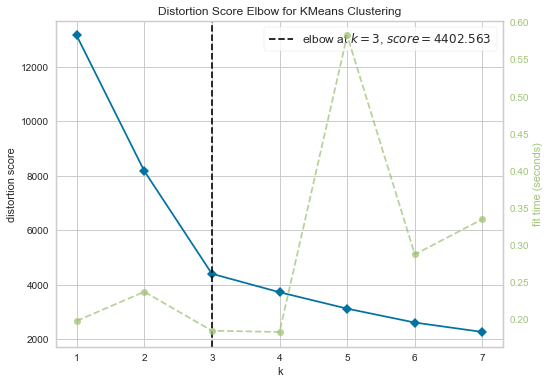

In [322]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(df_kmeans)        
visualizer.show();

<AxesSubplot:xlabel='x_coordinate', ylabel='y_coordinate'>

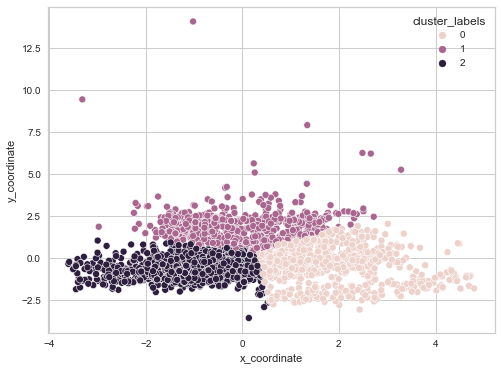

In [323]:
df_kmeans = pd.DataFrame({'x_coordinate': xs,
                          'y_coordinate': ys})

centroids, _ = kmeans(df_kmeans, 3)
df_kmeans['cluster_labels'],_ = vq(df_kmeans, centroids)

sns.scatterplot(x = 'x_coordinate', y = 'y_coordinate', 
                hue = 'cluster_labels', data = df_kmeans)

Silhouette Analysis

In [324]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [325]:
km = KMeans(n_clusters = 3, random_state = 42)
km.fit_predict(df)

score = silhouette_score(df, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.572


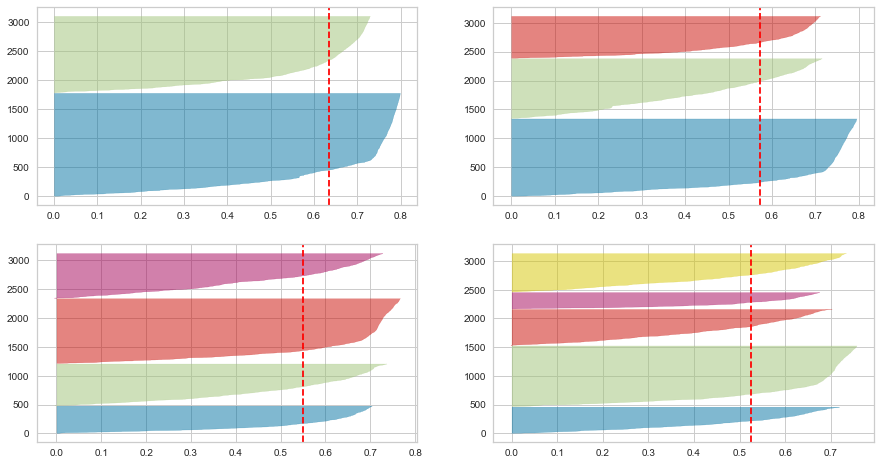

In [326]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize = (15, 8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters = i, init = 'k-means++',
               n_init = 10, max_iter = 100, random_state = 42)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(df)

The elbow method show that number of clusters = 3 is the best choice. Let's use silhouette analysis for another clustering analysis.

----------------------------------------------------------

Creating new variables to classify these three different fires categories, labelling 0, 1, 2.

In [327]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA(n_components = 6)
kmeans = KMeans(n_clusters = 3)
pipeline = make_pipeline(scaler, pca, kmeans)

pipeline.fit(df)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6)),
                ('kmeans', KMeans(n_clusters=3))])

In [328]:
labels = pipeline.predict(df)

In [330]:
df['labels'] = labels

In [332]:
df.head()

,Elevation,Latitude,Longitude,RainAccumulation,WindSpeedMPH,WindDirDegrees,AirTempStandPlace,RelativeHumidity,SolarRadiation,labels
0,950.0,44.02861,-90.08306,24.86,10.0,300.000000,36.0,58.0,420.000000,2
2,3320.0,46.30739,-105.02978,1.59,11.0,180.000000,55.0,44.0,442.000000,0
3,1500.0,38.03944,-122.57000,3.53,3.0,144.000000,62.0,78.0,138.000000,1
4,9170.0,37.33111,-106.29250,0.00,4.0,188.509687,51.0,22.0,366.765875,0
5,5535.0,43.17392,-115.15186,1.85,17.0,337.000000,43.0,87.0,345.000000,1


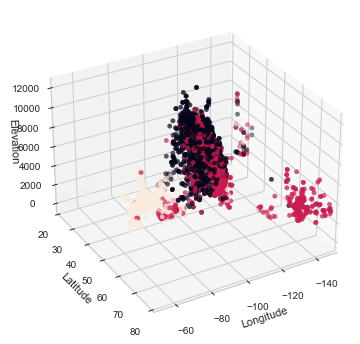

In [364]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

x = df['Longitude']
y = df['Latitude']
z = df['Elevation']
ax.scatter(x, y, z, c = labels, marker = 'o')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Elevation')

ax.set_xlim(-150,-50)
ax.set_ylim(20,80)
ax.view_init(30, 60)

plt.show()


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

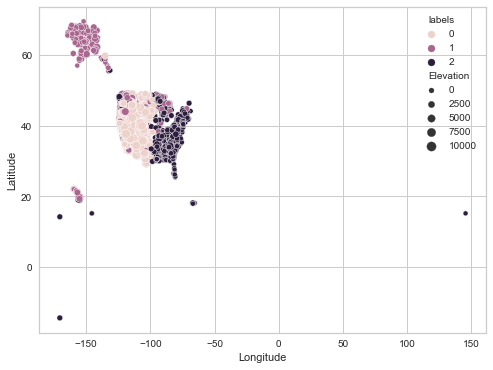

In [335]:
sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', size = 'Elevation', hue = 'labels')

<AxesSubplot:xlabel='RainAccumulation', ylabel='RelativeHumidity'>

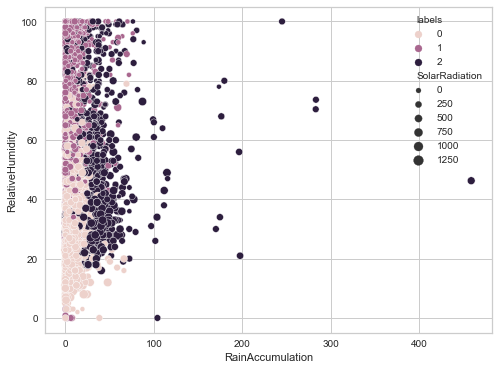

In [339]:
sns.scatterplot(data = df, x = 'RainAccumulation', y = 'RelativeHumidity', size = 'SolarRadiation', hue = 'labels')


<AxesSubplot:xlabel='AirTempStandPlace', ylabel='RelativeHumidity'>

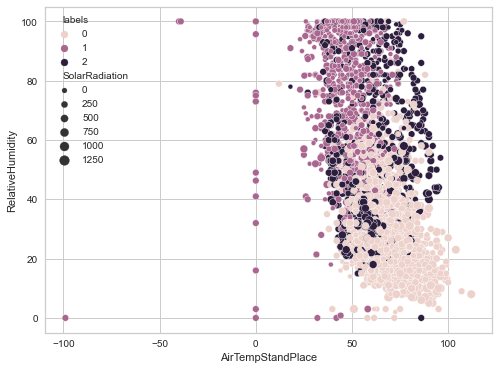

In [340]:
sns.scatterplot(data = df, x = 'AirTempStandPlace', y = 'RelativeHumidity', size = 'SolarRadiation', hue = 'labels')


-------------------------------------------------------------------------